# Codecademy Project
### Course: Data Science Foundation
#### Class: Data Visualization
---------
## Life Expectancy and GDP

### Project Goals
The main goal of this project is to perform an Exploratory Data Analysis (EDA) around the information regarding Life Expectancy and Gross Domestic Product (GDP) for 6 different countries between the years of 2000 and 2015.

With this information, we'll be able to: 
- Find if there's a correlation between the given variables;
- Understand the evolution in Life Expectancy and GDP over the years for each country;
- Compare the variables between countries.

### Dataset
The dataset provided has the following columns of data:

- **Country** - nation
- **Year** - the year for the observation
- **Life expectancy at birth (years)** - life expectancy value in years
- **GDP** - Gross Domestic Product in U.S. dollars

### Analysis

- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv('all_data.csv')
df.rename(columns={'Life expectancy at birth (years)': 'LEB'}, inplace=True)
countries = df['Country'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEB      96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,Year,LEB,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [5]:
df.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [8]:
round(74.75)

75

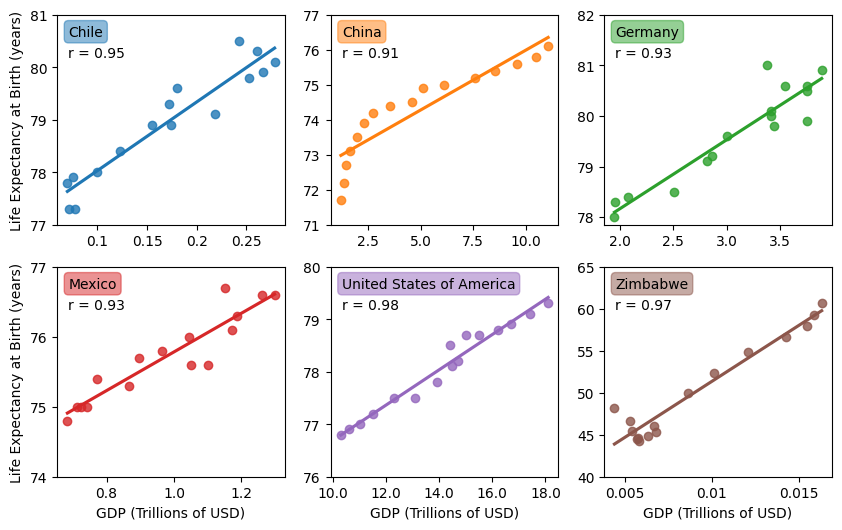

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,6))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

for i, (ax, country) in enumerate(zip(axs, countries)):
    # Plot each graph separated
    ax = plt.subplot(2, 3, i + 1)
    g = sns.regplot(df[df['Country'] == country], x='GDP', y='LEB', ci=False, color=colors[i])
    plt.annotate(country, xy=(0.05, 0.9), xycoords='axes fraction', bbox=dict(boxstyle="round", fc=colors[i], ec=colors[i], alpha=0.5))
    # Find and plot Pearson Correlation (r) for each graph
    r = stats.pearsonr(df[df['Country'] == country].GDP, df[df['Country'] == country].LEB)[0]
    plt.annotate(f'r = {r :.2f}', xy=(0.05, 0.8), xycoords='axes fraction')
    # Transform X-axis in Trillions of USD and normalize their ticks
    xticks = g.get_xticks()
    xlabels = [tick / 1e12 for tick in xticks]
    plt.xticks(ticks=xticks[1:-1], labels=xlabels[1:-1])
    # Transform Y-axis labels in integers
    yticks = [*set([round(tick) for tick in g.get_yticks()])]
    g.set(yticks=yticks)
    # Remove X and Y labels from graphs in the middle
    if ax in [ax1, ax4]:
        plt.ylabel('Life Expectancy at Birth (years)')
    else:
        plt.ylabel('')
    if ax in [ax4, ax5, ax6]:
        plt.xlabel('GDP (Trillions of USD)')
    else:
        plt.xlabel('')

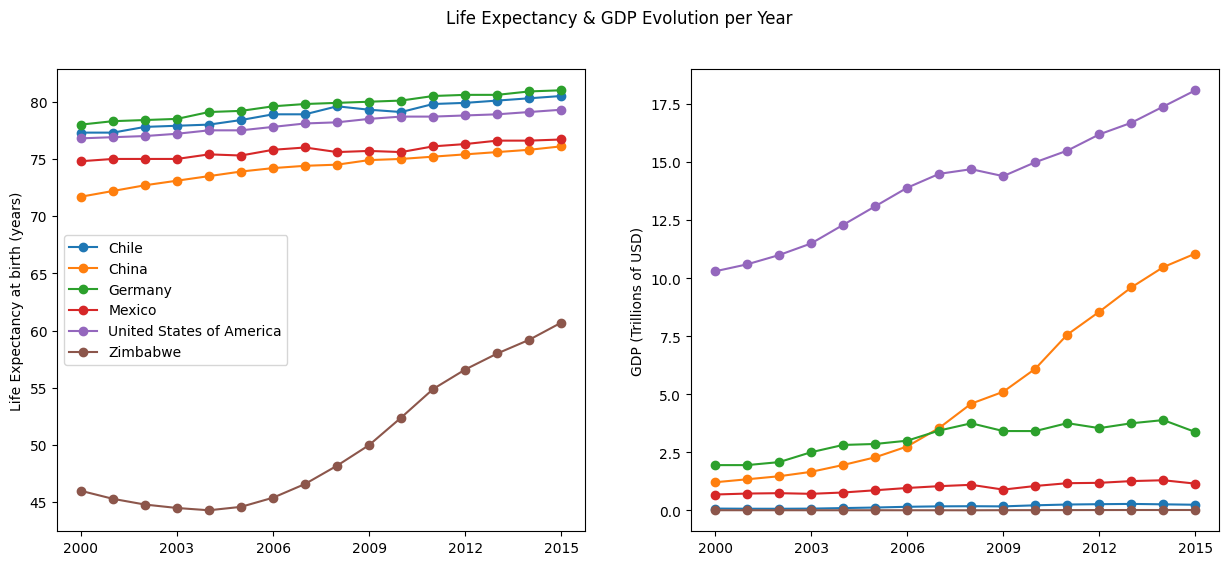

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharex='all')
plt.xticks(range(2000, 2016, 3))
plt.suptitle('Life Expectancy & GDP Evolution per Year')

ax1 = plt.subplot(121)
for country in countries:
    plt.plot(df[df['Country'] == country].Year, df[df['Country'] == country].LEB, label=country, marker='o')
plt.ylabel('Life Expectancy at birth (years)')
plt.legend()

ax2 = plt.subplot(122)
for country in countries:
    plt.plot(df[df['Country'] == country].Year, df[df['Country'] == country].GDP, marker='o')
plt.ylabel('GDP (Trillions of USD)')
plt.yticks(ticks=np.arange(0, 18.5e12, 2.5e12), labels=np.arange(0, 18.5, 2.5));

In [134]:
df[df['Country'] == 'Zimbabwe']

,Country,Year,LEB,GDP
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09
85,Zimbabwe,2005,44.6,5.755215e+09
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09


In [200]:
df[df['Country'] == 'China']

,Country,Year,LEB,GDP
16,China,2000,71.7,1.211350e+12
17,China,2001,72.2,1.339400e+12
18,China,2002,72.7,1.470550e+12
19,China,2003,73.1,1.660290e+12
20,China,2004,73.5,1.955350e+12
21,China,2005,73.9,2.285970e+12
22,China,2006,74.2,2.752130e+12
23,China,2007,74.4,3.552180e+12
24,China,2008,74.5,4.598210e+12
25,China,2009,74.9,5.109950e+12


In [207]:
help(xtick)

Help on Text in module matplotlib.text object:

class Text(matplotlib.artist.Artist)
 |  Text(x=0, y=0, text='', *, color=None, verticalalignment='baseline', horizontalalignment='left', multialignment=None, fontproperties=None, rotation=None, linespacing=None, rotation_mode=None, usetex=None, wrap=False, transform_rotates_text=False, parse_math=None, **kwargs)
 |  
 |  Handle storing and drawing of text in window or data coordinates.
 |  
 |  Method resolution order:
 |      Text
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __init__(self, x=0, y=0, text='', *, color=None, verticalalignment='baseline', horizontalalignment='left', multialignment=None, fontproperties=None, rotation=None, linespacing=None, rotation_mode=None, usetex=None, wrap=False, transform_rotates_text=False, parse_math=None, **kwargs)
 |      Create a `.Text` instance at *x*, *y* with string *text*.
 |      
 |      The text is aligned rel